In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from tqdm import tqdm as tqdm_botebook
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('cookie_cats.csv')
print(df.shape)
df.head()

(90189, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# Проверим, сколько пользователей играли в две версии

df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

Text(0, 0.5, 'Число игроков')

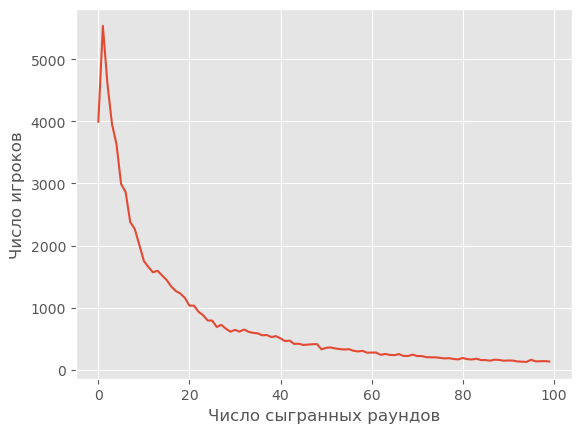

In [4]:
# Проделаем подобную операцию  для sum_gamerounds

plot_df = df.groupby('sum_gamerounds')['userid'].count()

ax = plot_df.head(100).plot()

ax.set_xlabel("Число сыгранных раундов")
ax.set_ylabel("Число игроков")

In [5]:
# Посмотрим на удержание игроков первого дня.

df.retention_1.mean()

0.4452095044850259

In [6]:
# И по группам

df.groupby('version').retention_1.mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [11]:
from statsmodels.stats.proportion import proportions_ztest

# Уровень значимости 5%

alpha = 0.05

df_agg = df.groupby('version').retention_1.agg(['sum', 'count', 'mean'])
df_agg


,sum,count,mean
version,,,
gate_30,20034,44700,0.448188
gate_40,20119,45489,0.442283


In [12]:
n_obs = df_agg['count'].values   # Размеры выборок
m_obs = df_agg['sum'].values   # Число успехов
p_obs = df_agg['mean'].values   # доли

z_obs, p_val = proportions_ztest(m_obs, n_obs, value=0, alternative='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}")
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение статистики: 1.78
P-значение: 0.0372


In [ ]:
'''
Гипотеза о равенстве долей отвергается на alpha = 0,05
Посмотрим на оценку мойности этого эксперимента.
'''

In [15]:
n_30, n_40 = n_obs   # Размеры выборок
p_30, p_40 = p_obs   # Доли

# Дисперсии
var_40, var_30 = p_40 * (1 - p_40), p_30 * (1 - p_30)

# вычисляем стандартизированный размер эффекта
effect = (p_30 - p_40) / ((n_40*np.sqrt(var_40) + n_30*np.sqrt(var_30)) / (n_30 + n_40))
effect

0.01188210610259806

In [17]:
n_obs[1]/n_obs[0]

1.0176510067114093

In [20]:
from statsmodels.stats.power import zt_ind_solve_power

zt_ind_solve_power(
    effect_size=effect,
    nobs1=sum(n_obs),
    alpha=0.05,
    power=None,
    ratio=n_obs[1]/n_obs[0],
    alternative='larger'
)

0.8131005106557109

In [ ]:
'''
Мощность теста соответствует стандартной 0.8
'''

In [ ]:
'''
Удержание 7-го дня
'''

In [21]:
df.groupby('version').retention_7.mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [22]:
# Снова выполним код для retention_7

from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

df_agg = df.groupby('version').retention_7.agg(['sum', 'count', 'mean'])

n_obs = df_agg['count'].values
m_obs = df_agg['sum'].values
p_obs = df_agg['mean'].values

z_obs, p_val = proportions_ztest(m_obs, n_obs, value=0, alternative='larger')

print(f"Наблюдаемое значение статистики: {z_obs:.3}")
print(f"P-значение: {p_val:.3}")

Наблюдаемое значение статистики: 3.16
P-значение: 0.000777


In [ ]:
'''
Для семидневного удержания произойдет довольно мощный обвал
'''

In [ ]:
'''
Вывод: сдвиг порот на 40 уровень вызывает увеличениеи оттока пользователей.
'''

In [ ]:
'''
В тесте допущена ошибка. 
Правильнее было бы считать пользователей с 30-го дня, но таких данных нет, 
а подсчет по раундам игры не вполне соответствует задаче.
'''